## Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('spam.csv', encoding='latin-1')
raw_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = raw_data.copy()
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
pd.set_option("display.max_colwidth", None)

## Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
# Droping columns Unnamed: 2, Unnamed: 3 and Unnamed: 4 since very few values are present
df_col_rmd = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df_col_rmd

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [11]:
# Drop Duplicates
df_col_rmd.drop_duplicates(keep='first', inplace=True)

In [12]:
df_col_rmd.shape

(5169, 2)

In [13]:
# Renaming the columns
df_col_rmd.rename(columns={'v1': 'tag', 'v2': 'text'}, inplace=True)

In [14]:
print(df_col_rmd.shape)
df_col_rmd.head()

(5169, 2)


,tag,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [15]:
df_col_rmd['tag'].value_counts(normalize=True)

tag
ham     0.87367
spam    0.12633
Name: proportion, dtype: float64

In [16]:
# Create a new copy

df_col_rmd_encode = df_col_rmd.copy()
df_col_rmd_encode.head()

,tag,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [17]:
# import LabelEncoder class from sklearn to transform categorical data into numerical data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df_col_rmd_encode['tag'])

LabelEncoder()

In [18]:
df_col_rmd_encode['tag'] = label_encoder.transform(df_col_rmd_encode['tag'])
df_col_rmd_encode.head()

,tag,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [19]:
import nltk

nltk.download('punkt')  
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\NS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
# count characters in the text
def count_char(text):
    return len(text)

# count the words in the text
def count_words(text):
    return len(nltk.word_tokenize(text))

# count the sentences in the text
def count_sentence(text):
    return len(nltk.sent_tokenize(text))

In [21]:
df_col_rmd_encode['chars'] = df_col_rmd_encode['text'].apply(count_char)
df_col_rmd_encode['words'] = df_col_rmd_encode['text'].apply(count_words)
df_col_rmd_encode['sentence'] = df_col_rmd_encode['text'].apply(count_sentence)
df_col_rmd_encode.head()

,tag,text,chars,words,sentence
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1


In [22]:
df_col_rmd_encode.describe()

,tag,chars,words,sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
# ham description
df_col_rmd_encode[df_col_rmd_encode['tag']==0].describe()

,tag,chars,words,sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [24]:
# spam description
df_col_rmd_encode[df_col_rmd_encode['tag']==1].describe()

,tag,chars,words,sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


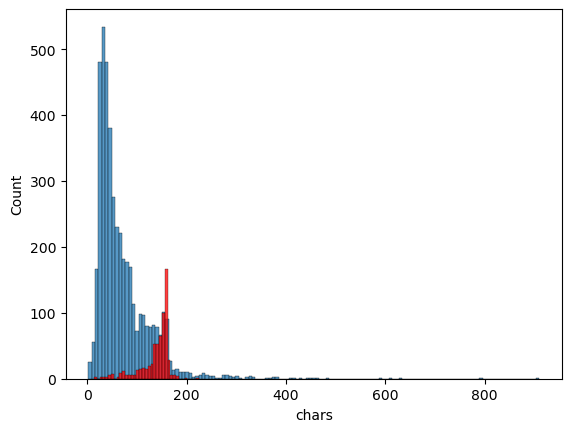

In [25]:
# Visualizing ham and spam characters
sns.histplot(df_col_rmd_encode[df_col_rmd_encode['tag']==0]['chars'])
sns.histplot(df_col_rmd_encode[df_col_rmd_encode['tag']==1]['chars'], color='red')
plt.show()

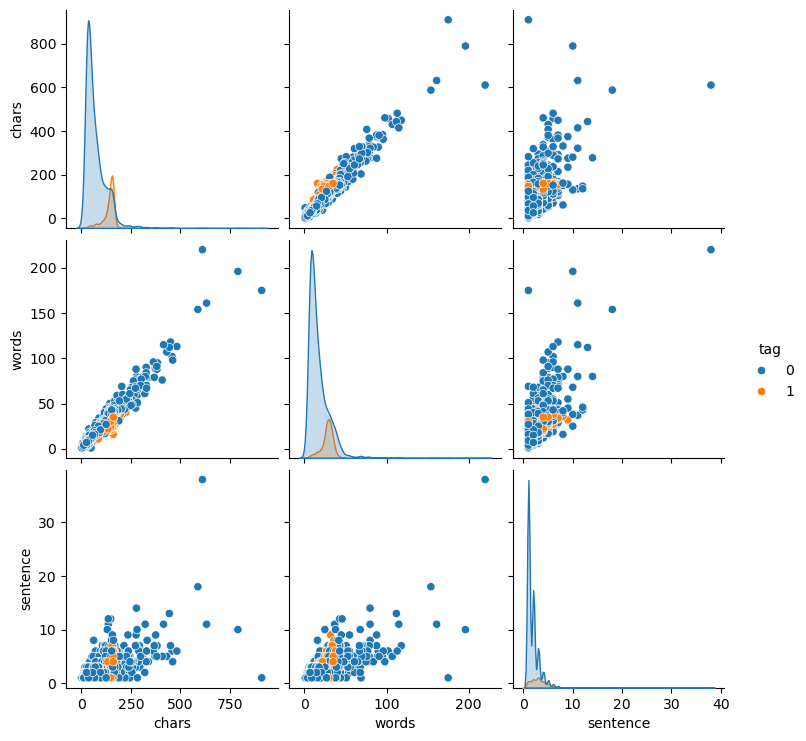

In [26]:
sns.pairplot(df_col_rmd_encode, hue='tag')

In [27]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
# ps.stem('going')

In [30]:
# Create a function for text column

def transformation_of_text(text):

    # convert text into lower case
    text = text.lower()

    # create word tokens
    text = nltk.word_tokenize(text)  # Now works!

    # remove special characters
    y = []
    for t in text:
        if t.isalnum():
            y.append(t)

    # remove stopwords
    text = y[:]
    y.clear()
    for t in text:
        if t not in stopwords.words('english'):
            y.append(t)

    # now proceed with word stemming
    text = y[:]
    y.clear()
    for t in text:
        y.append(ps.stem(t))
    
    return " ".join(y)

In [31]:
sample_text = df_col_rmd_encode['text'][1005]

print("Sample Text:\n"+sample_text)
print("\nTransformed Text:\n"+transformation_of_text(sample_text))

Sample Text:
Give me a sec to think think about it

Transformed Text:
give sec think think


In [32]:
df_col_rmd_encode['transformed_text'] = df_col_rmd_encode['text'].apply(transformation_of_text)
df_col_rmd_encode.head()

,tag,text,chars,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


In [33]:
# wordcloud for spam and ham texts
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white') 

In [34]:
spam_wc = wc.generate(df_col_rmd_encode[df_col_rmd_encode['tag']==1]['transformed_text'].str.cat(sep=' '))

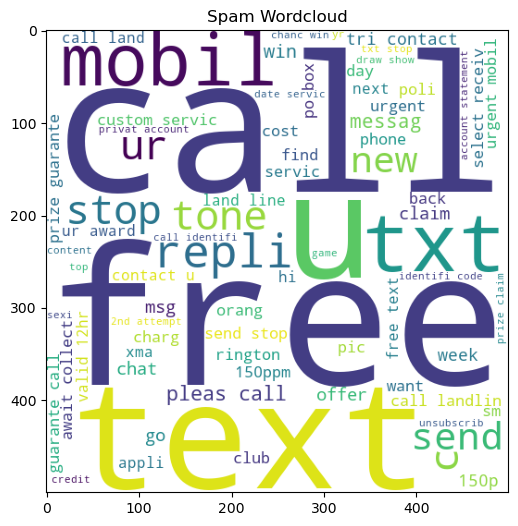

In [35]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)
plt.title('Spam Wordcloud')
plt.show()

In [36]:
ham_wc = wc.generate(df_col_rmd_encode[df_col_rmd_encode['tag']==0]['transformed_text'].str.cat(sep=' '))

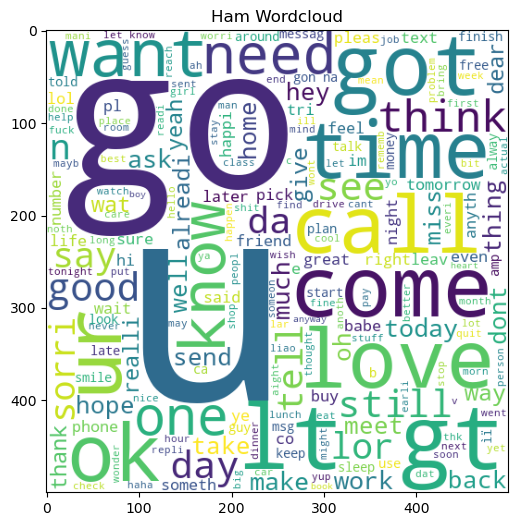

In [37]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)
plt.title('Ham Wordcloud')
plt.show()

In [38]:
spam_words = []
for sen in df_col_rmd_encode[df_col_rmd_encode['tag']==1]['transformed_text'].to_list():
    for word in sen.split():
        spam_words.append(word)

In [39]:
len(spam_words)

9939

C:\Users\NS\AppData\Local\Temp\ipykernel_18916\136539789.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= words, y=frequency, palette='husl')


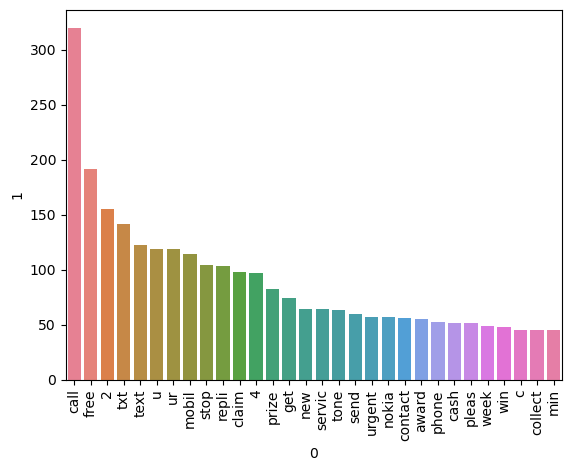

In [40]:
from collections import Counter

words = pd.DataFrame(Counter(spam_words).most_common(30))[0]
frequency = pd.DataFrame(Counter(spam_words).most_common(30))[1]

sns.barplot(x= words, y=frequency, palette='husl')
plt.xticks(rotation='vertical')
plt.show()

In [41]:
ham_words = []
for sen in df_col_rmd_encode[df_col_rmd_encode['tag']==0]['transformed_text'].to_list():
    for word in sen.split():
        ham_words.append(word)

In [42]:
len(ham_words)

35404

C:\Users\NS\AppData\Local\Temp\ipykernel_18916\3229162606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= words, y=frequency, palette='husl')


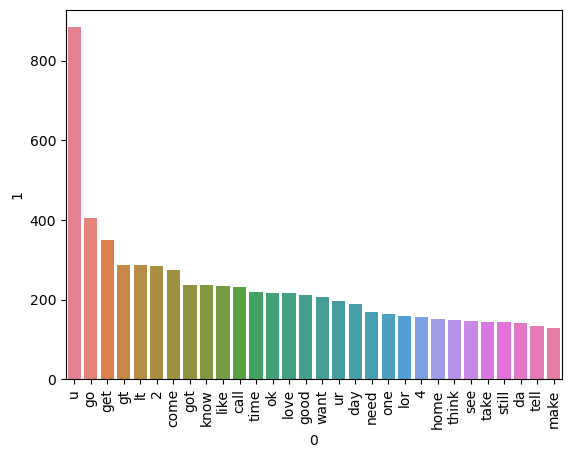

In [43]:
from collections import Counter

words = pd.DataFrame(Counter(ham_words).most_common(30))[0]
frequency = pd.DataFrame(Counter(ham_words).most_common(30))[1]

sns.barplot(x= words, y=frequency, palette='husl')
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [251]:
df_model = df_col_rmd_encode.copy()
df_model.head()

,tag,text,chars,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


In [253]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [255]:
X = tfidf.fit_transform(df_model['transformed_text']).toarray()

In [257]:
X.shape

(5169, 3000)

In [259]:
y = df_model['tag'].values

In [261]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [267]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

BernoulliNB()

In [269]:
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes Model:")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

Gaussian Naive Bayes Model:
0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [271]:
y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes Model:")
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

Multinomial Naive Bayes Model:
0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [273]:
y_pred3 = bnb.predict(X_test)
print("Bernoulli Naive Bayes Model:")
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

Bernoulli Naive Bayes Model:
0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [243]:
# We will use tfidf vectorizer and Multinomial Naive Bayes Algorithm (MNB) as Precision is the highest amoung three algorithms

In [277]:
import pickle


with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

with open('model.pkl', 'wb') as file:
    pickle.dump(mnb, file)